# Matplotlib 拓展包教学（Matplotlib Extension Package Tutorial）
参考：</br>
https://matplotlib.org/stable/users/index.html</br>
Python Data Science Handbook

## 前置要求
拥有 Python 环境（版本>2.7）</br>Numpy 拓展包

## 安装Matplotlib
### 1.conda
如果系统内的 Python 环境是使用 Conda 进行安装的,在控制台（ cmd/Terminal/iTerm ）输入：
```
!conda install matplotlip
```
或者
```
!conda install -c conda-forge matplotlib
```
！如果出现 SSL 问题，打开根目录下的配置文件 .condarc , 修改：
```
ssl_verify: false
```
如果还是出现问题最终解决方案为翻墙，如果还是不行请使用其余方法。
### 2.pip
在控制台输入：
```
!pip install matplotlib
```
或者
```
!python -m pip install -U matplotlib
```
！当（ Mac ）系统内有多个 Python 版本，Python 3.X 版本的 pip 为 pip3。
### Anaconda
使用Anaconda进行环境和拓展包管理：</br>
下载地址：https://www.anaconda.com/products/distribution
### 3.git
作为最后的选择，可以通过 git 直接 clone 源文件进行安装：
```
!git clone https://github.com/matplotlib/matplotlib.git
```
或者
```
!git clone git@github.com:matplotlib/matplotlib.git
```
之后输入：
```
!cd matplotlib
!python -m pip install .
```
然后安装其他依赖文件：
```
!python -m pip install -r requirements/dev/dev-requirements.txt
```

## 导入拓展包
因为我们的课程是基于 Python，所以我们需要使用 Matplotlib 下面的 Pyplot 子拓展包。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("default")

然后我们可以检查 Matplotlib 的版本：

In [2]:
print(mpl.__version__)

3.5.2


我们还需要导入 Numpy 作为我们操作数据的工具：

In [3]:
import numpy as np
print(np.__version__)

1.21.6


Matplotlib 作为画图工具，可以直接在屏幕上显示图表，也可以输出图标到指定位置。为了使画出来的图表处在 Jupyter Notebook 的行文内，我们需要修改：

In [4]:
%matplotlib inline

根据个人需求可以修改默认字体大小：
```python
matplotlib.rcParams.update({'font.size': 16})
```

默认设置下， Matplotlib 并不支持中文显示，所以我们需要从本地系统库中调用中文字体：

In [5]:
import os
from matplotlib.font_manager import FontProperties
abspath = os.path.abspath(os.sep)
font_set = FontProperties(fname = abspath+"/Library/Fonts/思源黑体SourceHanSansCN-Regular.otf", size = 15)#这里的路径换成本地的ttf/otf文件

## 绘制简单折线图（ Line plots ）
在小学大家都学过连点成线，折线图作为最简单直观的视觉化图表也是同理。</br>
假设有公司A和公司B在某个季度内月销售额如下：

月份| $A$/M¥
----------:|----------:
1         | 20
2         | 50
3         | 15
4         | 66

我们可以绘制月销售额在y-轴和月份在x-轴，展示销售额每月的变化。</br>
首先创建两个list分别存储两个数据集：

In [6]:
A =[20, 50, 15, 66]
M = [1, 2, 3, 4]

然后我们使用 plt.plot 函数来绘制图表：

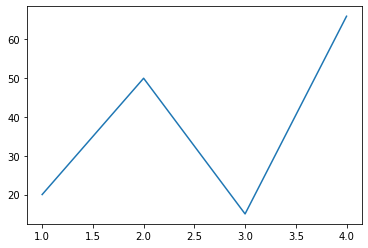

In [7]:
plt.plot(M, A)#plot(x, y)
plt.show()

但是这样的图表显然过于简洁了，对读者也不是十分友好，于是我们可以添加以下细节来丰富我们的图表：

#### 画布
在 Matplotlib 里面，所以的图表都是绘制在一个画布上（ figure ）：

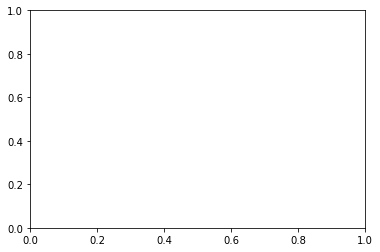

In [8]:
fig = plt.figure()
ax = plt.axes()

有了画布，我们还可以改变它的大小：

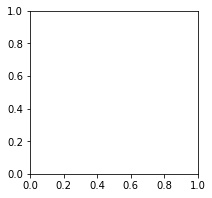

In [9]:
fig = plt.figure(figsize = (3,3))
ax = plt.axes()

其实从上面的内容我们不难看出 Matplotlib 支持两个创建画布的方式：</br>
##### .1
当我们只需要绘制一个图像，比如第一个例子，我们就可以通过```plt.plot()```
直接在后台创建画布和坐标系。此时，如果我们想要绘制多条线只需要重复使用```plt.plot()```
就可以了：

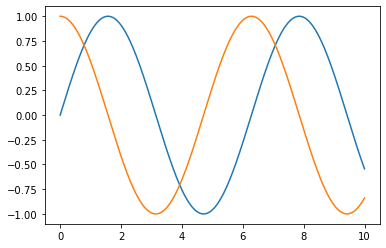

In [10]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

##### .2
我们还可以通过手动创建画布的方法更灵活的创建图表，这也允许我们创建多个图表在同一个画布中。方法一是使用```python
plt.subplot()
```，方法二是使用```python
plt.subplots()
```:

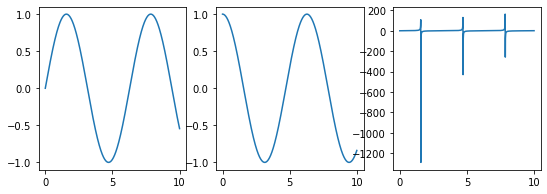

In [11]:
fig = plt.figure(figsize = (9,3))
plt.subplot(131)#1是行数，3是列数，第二个1是目标区域。
plt.plot(x, np.sin(x))
plt.subplot(132)
plt.plot(x, np.cos(x))
plt.subplot(133)
plt.plot(x, np.tan(x))
plt.show()

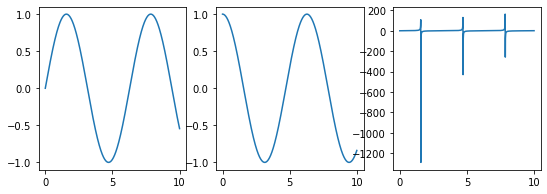

In [12]:
fig = plt.figure(figsize = (9,3))
ax = fig.subplots(1, 3)
#注意，这里是 fig.subplots ,因为 fig 已经在上一行创建了。
#如果省略创建 fig ，命令行为：fig, ax = plt.subplots(1, 3)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[2].plot(x, np.tan(x))
plt.show()

#### 网格
现在这个画布的背景太单一了，我们可以添加网格来辅助读者确定数值：

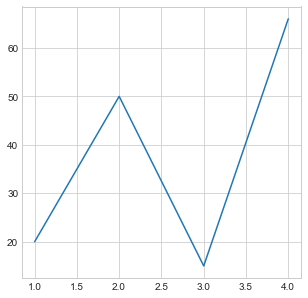

In [13]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (5,5))
plt.plot(M, A)
plt.show()

##### 颜色和数据样式
平常我们看到的折线图有着丰富的样式和颜色，Matplotlib 提供各种标记样式和颜色选择。我们可以通过以下方式更改线的颜色：

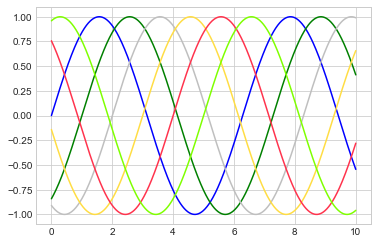

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # 用名称选择颜色
plt.plot(x, np.sin(x - 1), color='g')           # 用短名称选择颜色（rgbcmyk）
plt.plot(x, np.sin(x - 2), color='0.75')        # 设定灰度
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex 代码
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB 元组
plt.plot(x, np.sin(x - 5), color='chartreuse'); # 用HTML名称选择颜色
plt.show()

标记有以下选项：('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'x')

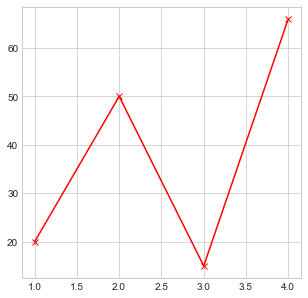

In [15]:
plt.figure(figsize = (5,5))
plt.plot(M, A, marker = "x", color = "r")
plt.show()

不止标记的样式，线的样式也可以选择：（' ':'什么都不画','-': '实线', '--': '划线（ dash ）', '-.': '点划结合', ':': '点线（ dot ）'）

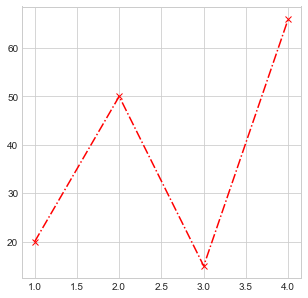

In [16]:
plt.figure(figsize = (5,5))
plt.plot(M, A, marker = "x", color = "r", linestyle = "-.")
plt.show()

Matplotlib 还提供一种简介的命令行绘制简单折线图：

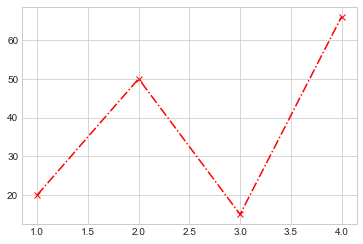

In [17]:
plt.plot(M, A, "-.xr")# -.xr 是 linestyle, marker & color 的结合
plt.show()

### 添加更多信息
除了比例尺和线的样式，坐标系的名称和图表标题也是必要的：

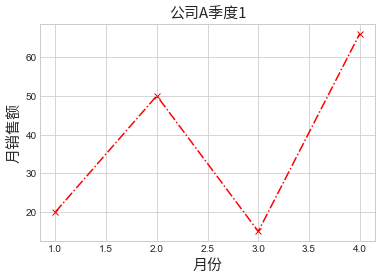

In [18]:
plt.plot(M, A, "-.xr")
plt.title("公司A季度1", fontproperties = font_set)
plt.xlabel("月份", fontproperties = font_set)
plt.ylabel("月销售额", fontproperties = font_set)
plt.show()

在图表有很多线条的时候，为了分清出线条，我们可以使用图例。这里只展示最基本的用法：

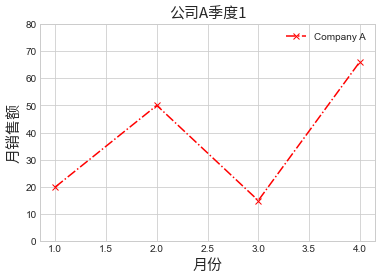

In [19]:
plt.plot(M, A, "-.xr", label = "Company A")
plt.title("公司A季度1", fontproperties = font_set)
plt.xlabel("月份", fontproperties = font_set)
plt.ylabel("月销售额", fontproperties = font_set)
plt.ylim(0, 80)#更改x轴的范围
plt.legend()
plt.show()

更多关于 legend 用法请参考：https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#legend-handlers

## 练习[1]
现在我们有一个公司B在与公司A同一季度内的月销量如下：

月份| $B$/M¥
----------:|----------:
1         | 70
2         | 40
3         | 80
4         | 54

我们现在要分别绘制公司A和公司B在这一季度内的月销量。要求公司A的图表在公司B的图表上方；图表大小要合适；添加适当的标题和坐标系名称；使用不同的 marker style 和 line style；两个图表的坐标系范围要合适且一样。[14]

In [20]:
#请在这里答题

## 绘制简单点状图（ Scatter plots ）
画点状图有两个函数可以使用：
```python
plt.plot()
```
和
```python
plt.scatter()
```

### 1.```plt.plot()```
我们先来看看我们熟悉的```plt.plot()```:
不难注意到，在 linestyle 里面有一个选项叫做“什么都不画”，顾名思义就是不画线断，使用只画 marker 的参数就可以画出点状图：

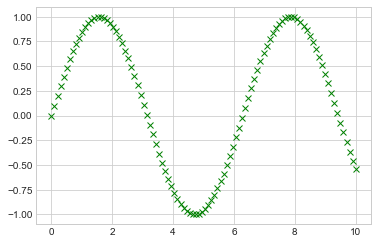

In [21]:
x_d1 = np.linspace(0, 10, 100)
plt.plot(x_d1, np.sin(x_d1), "xg")
plt.show()

使用 numpy 的 random 函数，我们可以模拟一个随机分布的点状图：

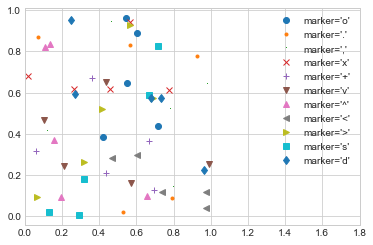

In [22]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

### 2.```plt.scatter()```
另一个更专业的函数就是```plt.scatter()```：

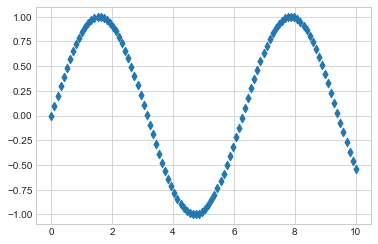

In [23]:
plt.scatter(x_d1, np.sin(x_d1), marker = "d")
plt.show()

乍一看和```plt.plot()```并没有什么不同，但是它更专业的地方就在于它可以绘制每个点的大小：

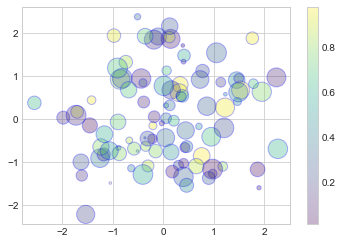

In [24]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 400 * rng.rand(100) #可以试着改变常数去了解 scatter 的 size 范围

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis', edgecolors="b")
plt.colorbar();  # 显示颜色比例尺

更多 Colormap 请参考：</br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 练习[2]
我们现在有一组组数据：

In [25]:
aX = np.random.normal(loc = 0.5, scale = 1.0, size = 50)
aY = np.random.normal(loc = 0.5, scale = 1.0, size = 50)
bX = np.random.normal(loc = 0.1, scale = 1.0, size = 50)
bY = np.random.normal(loc = 0.1, scale = 1.0, size = 50)
data = [[np.hstack((aX, bX))], [np.hstack((aY, bY))]]

现在需要把 data 中的 a 和 b 使用 scatter 或者 plot 画在同一张图表中。要求有 colormap ；有标题；a 和 b 的颜色要区分开；大小设定为100。[5]

In [26]:
#请在此答题

### ```plt.plot()``` VS ```plt.scatter()```
虽然之前提到```plt.scatter()```比```plt.plot()```更专业，是因为它比后者展示了更多关于数据的信息，然而在效率层面上后者反而比前者更高效：因为前者需要渲染 marker 的颜色和大小，所以在大量的数据前，使用```plt.plot()```会更快得到图表。

## 绘制长条图（ Bar chart ）和简单直方图（ Histogram ）
在 Data Science 里面，长条图和直方图都是很好用的可视化工具，统计一个数据集内，处在某特定值域（ bin ）内数据的数量。
### 长条图
在小学我们就学会了手绘长条图，在 Matplotlib 里面也是非常简单的一个函数就可以绘制：

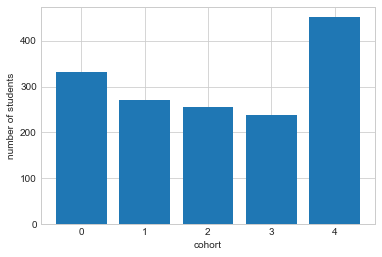

In [27]:
num_students = (332, 270, 256, 238, 451)
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
x_pos = np.arange(len(cohort))
plt.bar(x_pos, num_students, align='center')
plt.xlabel('cohort')
plt.ylabel('number of students')
plt.show()

但是这个长条图并没有展示我们想要的效果，我们想要每个 cohort 的名字在每个长条的下方：

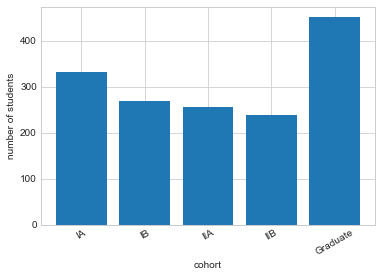

In [28]:
plt.bar(x_pos, num_students, align='center')
plt.xlabel('cohort')
plt.ylabel('number of students')
plt.xticks(x_pos, cohort, rotation=30)#替换x轴下面的量程为 cohort list 里面的数据
plt.show()

### 直方图 
直方图和长条图的区别在于前者更多适用于绘制大量的数据，而后者更方便小量的数据。
我们以绘制50000个由高斯正态分布生成的随机数为例：

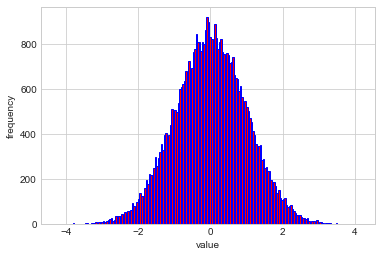

In [29]:
# loc=平均数（ mean ）, scale=标准差（ stddev ）, size=样本数量（ num samples ）
x = np.random.normal(loc=0.0, scale=1.0, size=50000)
n, bins, patches = plt.hist(x, 200, color = "r", edgecolor = "b");
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

从可视度来讲，这张图每个 bin 的边缘非常密集，这时我们可以更改函数的 histstyle 来增加观赏性：

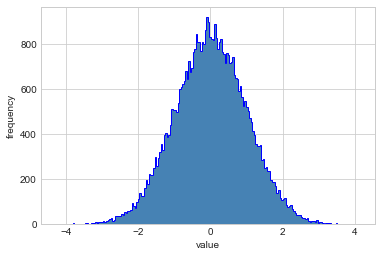

In [30]:
n, bins, patches = plt.hist(x, 200, histtype='stepfilled', color='steelblue',
         edgecolor='b');
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

多个直方图在同一画布：

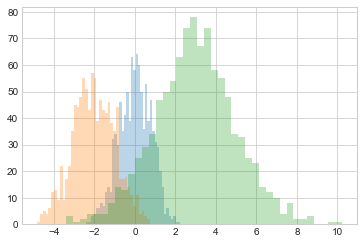

In [31]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40) 
plt.hist(x1, **kwargs)
#参数解引用（ Keyword Arguments ），在 Python 基础预习材料里有详解。
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

## 练习[3]
请在一张图表中画出np.random.RandomState.weibull()和np.random.RandomState.standard_gamma()分别采样10000个的直方图。要求有 histtype ；要有正确使用的 legend ；要有合适的坐标系；要有 alpha 。[7]

In [32]:
#请在此答题

## 饼状图（Pie charts）
作为基础的可视化图表，饼转图表示每个数据在总体的占比。以2011年剑桥郡（ Cambridgeshire ）内选区人口数据为例：
District              | Population
---------------------:|------------:
Cambridge City        | 123900
East Cambridgeshire   | 83800
Fenland               | 95300
Huntingdonshire       | 169500
South Cambridgeshire  | 148800

我们首先把数据输入到一个 tuple 里：

In [33]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

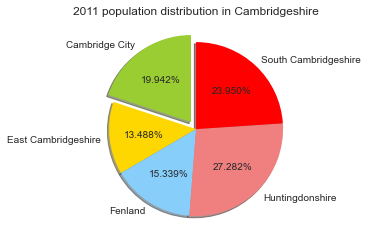

In [34]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
# 突出第一个数据
explode = (0.1, 0, 0, 0, 0)  
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=90)
plt.title("2011 population distribution in Cambridgeshire")
plt.show()

## 误差条形图（Errorbars）
在一些基础的物理实验课堂上，同学们一定接触过绘制误差这一任务。对于统计学来说误差也是非常重要的，它展示设想和现实情况的区别。假设我们测量了50个数据，由于测量器具并不是完全理想的，其具有0.8的误差，我们就可以这样绘制误差图：

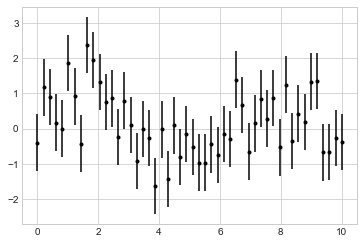

In [35]:
x = np.linspace(0, 10, 50)
dy = 0.8#设置误差为0.8
y = np.sin(x) + dy * np.random.randn(50)#生成数据

plt.errorbar(x, y, yerr=dy, fmt='.k');

上图绘制了数据在Y轴的误差，我们同样可以绘制数据在X轴的误差：

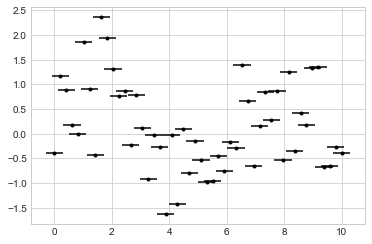

In [36]:
plt.errorbar(x, y, xerr=0.3, fmt='.k')
plt.show()

同样的我们可以更 Stylish ：

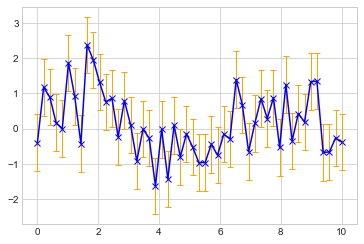

In [37]:
plt.errorbar(x, y, yerr=dy, fmt='-x', color='blue',
             ecolor='orange', elinewidth=1, capsize=3)
plt.show()

## 密度图与恒值线图（ Density plots & Contour plots ）
现在我们进行一个小小的升维：在前面的图表中，我们一直展现的是两组数据之间的关系（ x 与 y ，M 与 A，etc ），现在我们要用二维的图表展现三组数据之间的关系（2.5维:)），因此我们需要用到密度图或者恒值线图（等高线图）。最经典的恒值线图就是地图上的等高线：
![Contour Example](./src/Geo-Contour-Example.jpeg)
##### Source:https://www.nationalgeographic.org/activity/make-contour-map/
### 密度图
要绘制密度，我们需要使用：
```python
plt.hist2d()
```
顾名思义，这个函数就是一个2维的直方图，颜色的深浅代表数值的大小。我们先用一个多元正态分布（ Multivariate Normal Distribution ）函数创造一组2维数据：

In [38]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

然后使用```plt.hist2d```绘图，在这里，第三维就变成了数据的密度（深浅）：

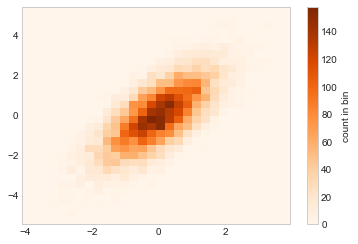

In [39]:
plt.hist2d(x, y, bins=30, cmap='Oranges')
cb = plt.colorbar(label='count in bin')

除次之外，还有另一个函数-```plt.hexbin```-拥有同样的功能，只不过绘制的是蜂窝状的六边形图案：

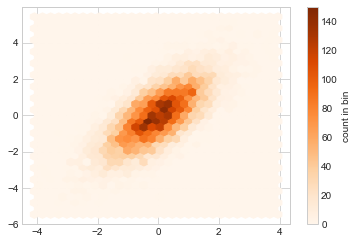

In [40]:
plt.hexbin(x, y, gridsize=30, cmap='Oranges')
cb = plt.colorbar(label='count in bin')

当我们把```hist2d```的 bin 参数调高，并且增加数据量时，会发现我们的数据并不完全符合多元正态分布，这很正常因为我们毕竟是使用的随机函数进行生成：

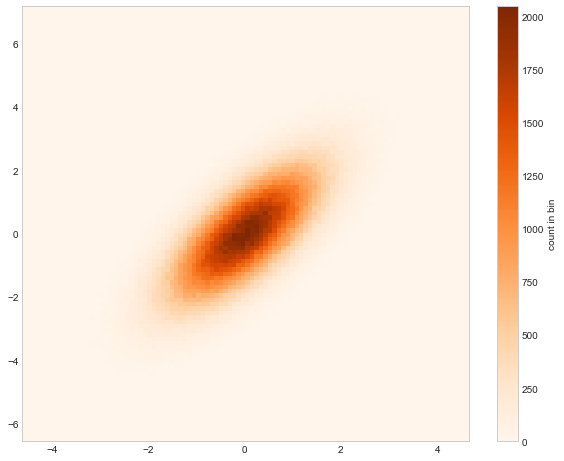

In [41]:
plt.figure(figsize=(10, 8))
x, y = np.random.multivariate_normal(mean, cov, 1000000).T
plt.hist2d(x, y, bins=100, cmap='Oranges')
cb = plt.colorbar(label='count in bin')

这时候，我们就可以使用一种叫做核密度估计（ Kernal Density Estimation ）的数据平滑化（ Data Smoothing ）方法对数据的密度进行估计。关于这个方法的详解请参考其他文献，在这里我们只需要知道这个方法可以让我们每一个离散的 bin 拥有一个对其边缘的连续估计。首先我们导入所需要的拓展包：

In [42]:
from scipy.stats import gaussian_kde

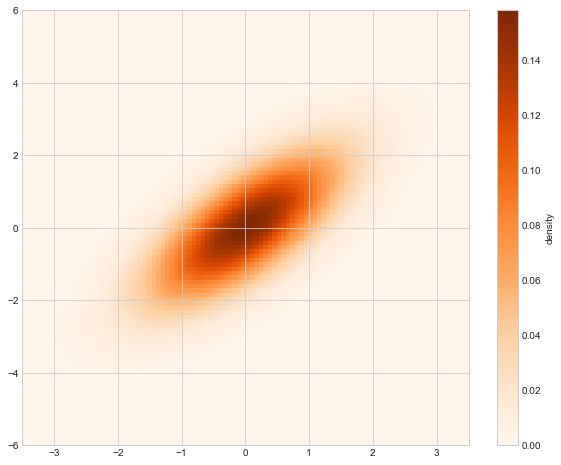

In [43]:
data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 100)
ygrid = np.linspace(-6, 6, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.figure(figsize=(10, 8))
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Oranges')
cb = plt.colorbar()
cb.set_label("density")

可以看到经过估计的图像更加符合多元正态分布，这也是它的作用所在。

### 恒值线图
恒值线图的主要目的是在于用2维图像可视化3维函数。
![Contour Example](./src/Contour-Example.png)
##### Source:https://www.researchgate.net/figure/Surface-plot-and-contour-plot-of-the-combined-effects-of-temperature-pH-and-time-on-the_fig3_317747423
</br>我们定义函数f(x, y)为：

$$
f(x, y) = \cos(x)\sin(x + y)^2
$$

再在
$$
(\pi, 2\pi)
$$
的区间内生成x和y的数值：

In [44]:
def f(x, y):
    return np.cos(x)*(np.sin(x+y)**2)
N = 300
x = np.linspace(np.pi, 2*np.pi, N)
y = np.linspace(np.pi, 2*np.pi, N)

然后我们使用 Numpy 去生成一个关于x,y的 grid

In [45]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

然后使用```plt.contour```绘制：

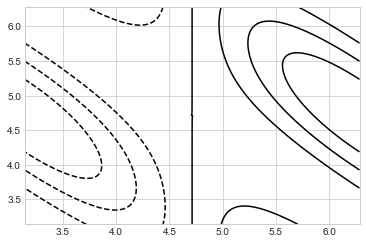

In [46]:
plt.contour(X, Y, Z, colors='black')
plt.show()

恒值线的颜色还可以是符合 Matplotlib.Colormap 的：

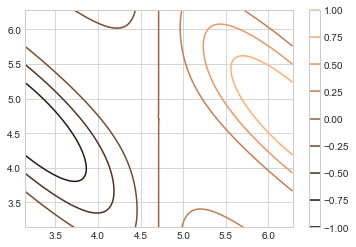

In [47]:
plt.contour(X, Y, Z, cmap = "copper")
plt.colorbar()
plt.show()

我们还可以填充恒值线之间的颜色：

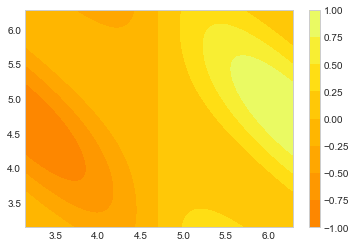

In [48]:
plt.contourf(X, Y, Z, cmap = "Wistia_r")
plt.colorbar()
plt.show()

## 练习[4]
请使用练习[3]生成的数据绘制一个 hist2d 图像。再在其右方绘制：
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right)
$$，范围 
$$
(-\pi, +\pi)
$$
的填色恒值线图。要求合适画布大小；合适坐标系；要有 Colorbar 和相印 label ；要有 Colormap。[10]

In [49]:
#请在此答题

## 3维绘图（ Three-dimensional plot )
首先导入拓展包。

In [50]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

因为3维绘图本质上和恒值线图展现的是一个东西，所以我们还是使用恒值线图的例子：

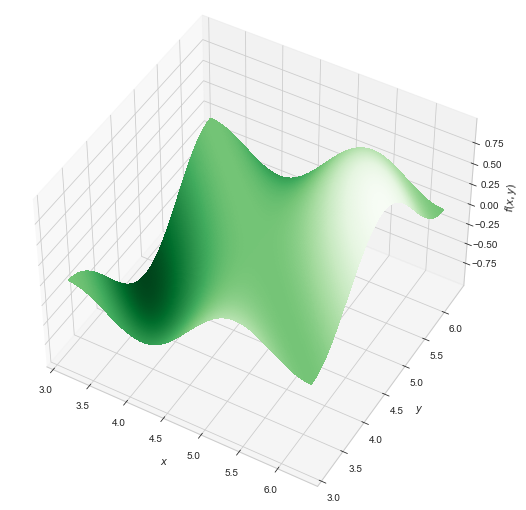

In [51]:
fig = plt.figure(figsize = (9, 9))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="Greens_r",
                       linewidth=0, antialiased=False)
                                              
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')

ax.view_init(elev=45)

plt.show()

## 标注
为了让图表更具说明性，标注是十分重要的：

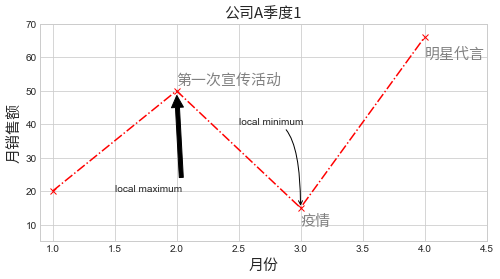

In [52]:
plt.figure(figsize = (8, 4))
plt.plot(M, A, "-.xr")
style = dict(size=15, color='gray', ha = "left")
plt.text(2, 51, "第一次宣传活动", fontproperties = font_set, **style, va = "bottom")
plt.text(3, 13, "疫情", fontproperties = font_set, **style, va = "top")
plt.text(4, 63, "明星代言", fontproperties = font_set, **style, va = "top")
plt.annotate('local maximum', xy=(2, 50), xytext=(1.5, 20),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', xy=(3, 15), xytext=(2.5, 40), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));
plt.xlim(0.9, 4.5)
plt.ylim(5, 70)
plt.title("公司A季度1", fontproperties = font_set)
plt.xlabel("月份", fontproperties = font_set)
plt.ylabel("月销售额", fontproperties = font_set)
plt.show()

更多箭头类型请参考：https://matplotlib.org/stable/gallery/text_labels_and_annotations/fancyarrow_demo.html

## 提问及评分
你还有什么想要提的问题：

### 练习评分

分数：(格式a/15 + b/5 + c/7 + d/10 = e/37)

批改人：